In [63]:
# https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset in a dataframe using Pandas
df_tmp = pd.read_csv("C:/Users/Paul de Waal/OneDrive/Documenten/VU BADS/Module 10 - AI - Data mining & Machine learning/Opdracht 1/train_titanic.csv")

# Preview top 10 records
df_tmp.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
# descriptive analysis
df_tmp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
# show sum of missing values per attribute
df_tmp.apply(lambda x: sum(x.isnull()),axis=0) 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sex unique values =  {0, 1}
Embarked unique values =  {0, 1, 2}
Cabin unique values =  {0, 1}


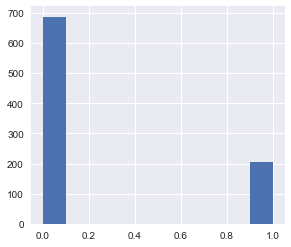

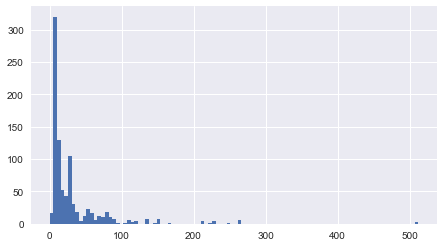

In [66]:
# SEX and EMBARKED and CABIN

# define mappings  
def map_sex(value):
    result = 3
    if value in ('female',0): result = 0
    if value in ('male',1): result = 1
    return result

def map_embarked(value):
    result = 5
    if value in ('C',0): result = 0
    if value in ('Q',1): result = 1
    if value in ('S',2): result = 2
    if value in ('',3): result = 3     
    return result

def map_cabin(value):
    result = value
    if isinstance(value, str):
        if len(str(value))>0: result = 1
    return result    
        
# map female/male to numeric: {0,1}
df_tmp['Sex'] = df_tmp['Sex'].apply(map_sex)

# handle nulls: Fill two empty rows with value S because there are only two rows and S is most frequent
# map embarked to numeric: {0,1,2}
df_tmp['Embarked'] = df_tmp['Embarked'].fillna('S')
df_tmp['Embarked'] = df_tmp['Embarked'].apply(map_embarked)

# map cabin & habdle nulls
df_tmp['Cabin'] = df_tmp['Cabin'].fillna(0)
df_tmp['Cabin'] = df_tmp['Cabin'].apply(map_cabin)

# evaluate results
print('Sex unique values = ', set(df_tmp['Sex']))
print('Embarked unique values = ', set(df_tmp['Embarked']))
print('Cabin unique values = ', set(df_tmp['Cabin']))

# show histogram 
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_tmp['Cabin'].hist(bins=10)
plt.show()

# show histogram 
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)
df_tmp['Fare'].hist(bins=100)
plt.show()

df1[Age]= 0


C:\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda\lib\sit

df2[Age]= 177
df3[Age]= 0


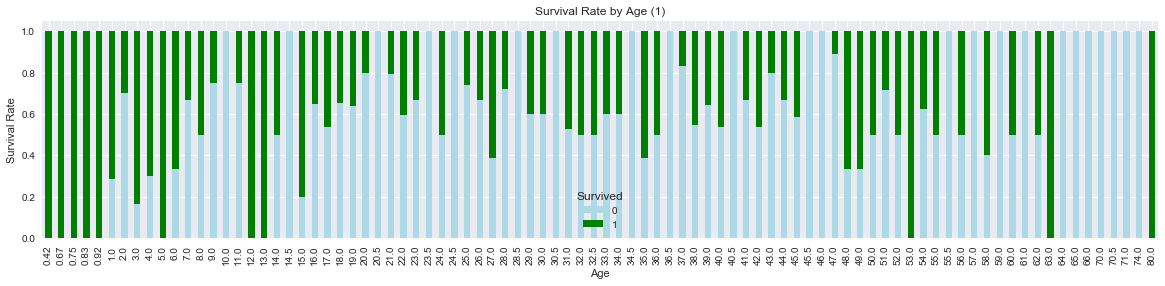

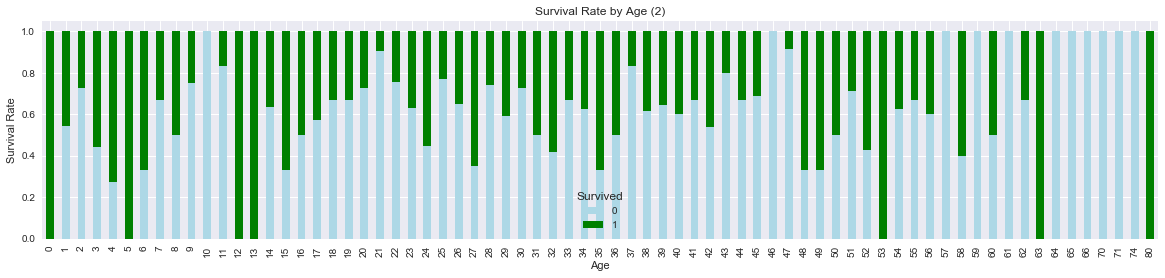

In [67]:
# AGE

# handle missing values for Age
# train model for mising values in column 'Age'
import math
from sklearn import tree

# split in training set and prediction set
# df1: remove empty rows for column Age
# df2: select empty rows
df1 = df_tmp[df_tmp.Age.isnull() != True]
df2 = df_tmp[df_tmp.Age.isnull() == True]

# Age: n/o missing values
print('df1[Age]=',sum(df1['Age'].isnull()))
print('df2[Age]=',sum(df2['Age'].isnull()))

# round floating point values for FARE and AGE
df1['Fare'] = df1['Fare'].astype(int)
df1['Age'] = df1['Age'].astype(int)
df2['Fare'] = df2['Fare'].astype(int)

# show sum of missing values per attribute
df1.apply(lambda x: sum(x.isnull()),axis=0) 
df2.apply(lambda x: sum(x.isnull()),axis=0) 

# apply decision tree classifier
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(df1.iloc[:,[1,2,4,6,7,9,11]] , df1.iloc[:,[5]])

# predict null values for age
df2.iloc[:,[5]] = clf_fit.predict(df2.iloc[:,[1,2,4,6,7,9,11]])

#print('Missing values for AGE after prediction...')
#print('df2[Age]=',sum(df2['Age'].isnull()))
df3 = pd.concat([df1,df2])
print('df3[Age]=',sum(df3['Age'].isnull()))

# descriptive analysis
df3.describe()

# Visualise survival rate by title
title_xt = pd.crosstab(df['Age'], df['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Age (1)', figsize=(20, 4), color=['LightBlue','Green'])
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()
title_xt = pd.crosstab(df3['Age'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Age (2)', figsize=(20, 4), color=['LightBlue','Green'])
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

Title mapping:  {'Lady', 'Mrs', 'Miss', 'Ms', 'Mme', 'Rev', 'Col', 'Don', 'Master', 'Major', 'Dr', 'the Countess', 'Jonkheer', 'Capt', 'Mlle', 'Sir', 'Mr'}


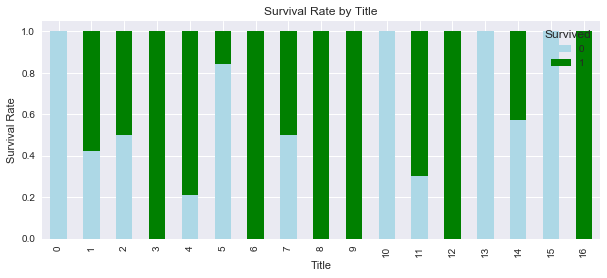

In [68]:
# NAME

def split_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
def map_title(title):
    titlearr = ['Capt', 'Master', 'Col', 'the Countess', 'Mrs', 'Mr', 'Lady', 'Major', 'Sir', 'Ms', 'Jonkheer', 'Miss', 'Mme', 'Rev', 'Dr', 'Don', 'Mlle']
    if title in titlearr:
        # get matching position and store index as normalised title value
        return titlearr.index(title)
    else:
        return 0
    
# Split column: name      
df3['Title'] = df3['Name'].apply(split_title)
# Show unique values
print('Title mapping: ', set(df3['Title']))
# Map title to numeric value
df3['Title'] = df3['Title'].apply(map_title)

# show results
#df3.describe()
#df3.head(10)

# Visualise survival rate by title
title_xt = pd.crosstab(df3['Title'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Title', figsize=(10, 4), color=['LightBlue','Green'])
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

# classification by decision tree: gets better result if variance was reduced to few a classes
# group index values in 3 categories: low, medium, high
# title_class_high = [3,6,8,9,12,16]
# title_class_medium = [1,2,4,7,11,14]
# title_class_low = [0,5,10,13,15]

# def map_title_class(index):
#     if index in title_class_high:
#         return 2
#     if index in title_class_medium:
#         return 1
#     if index in title_class_low:
#         return 0
# # map title to a group
# df3['Title'] = df3['Title'].apply(map_title_class)
# #df3['Title'] = map_title_class(df3['Title'])

# # Visualise survival rate by title
# title_xt = pd.crosstab(df3['Title'], df3['Survived'])
# title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
# title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Title', figsize=(10, 4), color=['LightBlue','Green'])
# plt.xlabel('Title')
# plt.ylabel('Survival Rate')
# plt.show()


{1, 2, 3}


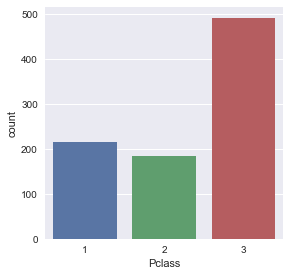

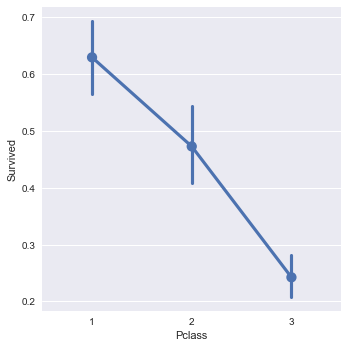

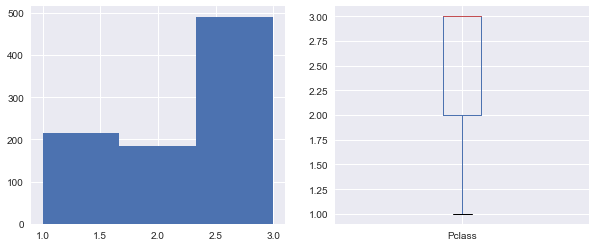

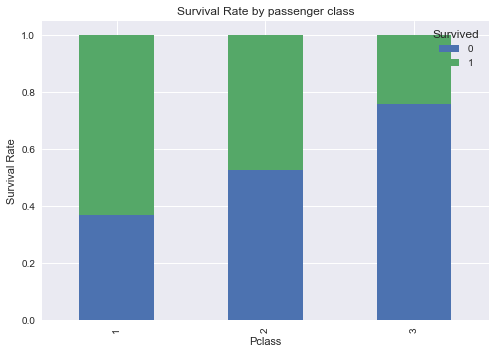

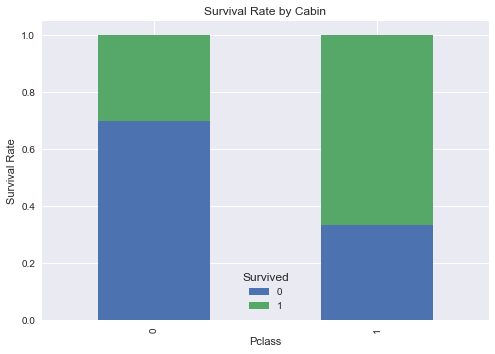

In [69]:
# PCLASS

# no missing values or 0
print(set(df3['Pclass']))

sns.factorplot('Pclass',data=df3,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=df3,size=5)

# show histogram for attribute Age
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df3['Pclass'].hist(bins=3)
# show boxplot
plt.subplot(1, 2, 2)
df3.boxplot(column='Pclass')

# Visualise survival rate by title
title_xt = pd.crosstab(df3['Pclass'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by passenger class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()
# Visualise survival rate by cabin
title_xt = pd.crosstab(df3['Cabin'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Cabin')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

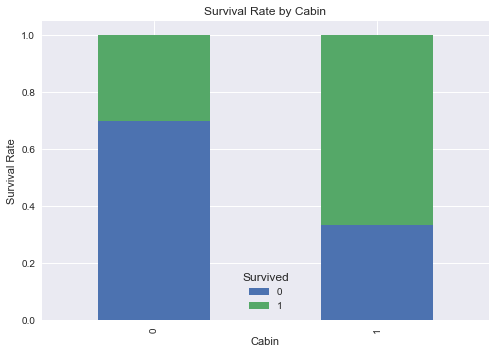

In [70]:
# Visualise survival rate by cabin
title_xt = pd.crosstab(df3['Cabin'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Survival Rate')
plt.show()



{0, 1, 2, 3, 4, 5, 6}


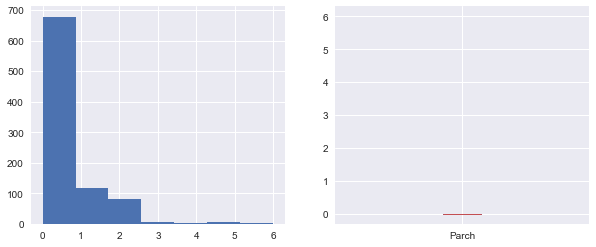

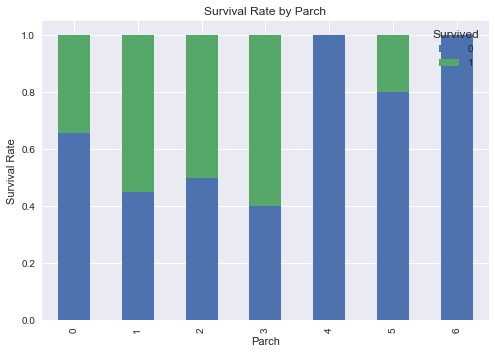

{0, 1, 2, 3, 4, 5, 8}


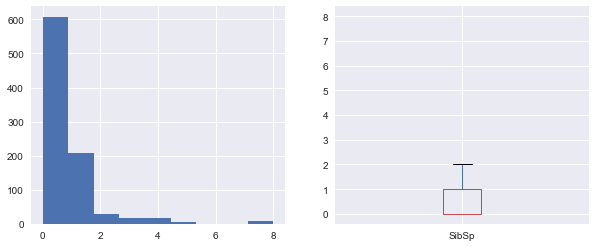

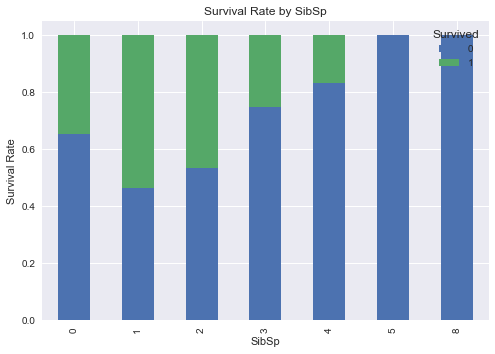

In [71]:
# Parch & SibSp

# no missing values or 0
print(set(df3['Parch']))

# show histogram for attribute Age
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df3['Parch'].hist(bins=7)
# show boxplot
plt.subplot(1, 2, 2)
df3.boxplot(column='Parch')
plt.show()

# Visualise survival rate by title
title_xt = pd.crosstab(df3['Parch'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Parch')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.show()

# no missing values or 0
print(set(df3['SibSp']))

# show histogram for attribute Age
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df3['SibSp'].hist(bins=9)
# show boxplot
plt.subplot(1, 2, 2)
df3.boxplot(column='SibSp')
plt.show()

# Visualise survival rate by title
title_xt = pd.crosstab(df3['SibSp'], df3['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()

# Show count and relationship Survival rate
#sns.factorplot('Parch',data=df3,kind='count',order=[0,1,2,3,4,5,6])
#sns.factorplot('Parch','Survived',order=[0,1,2,3,4,5,6], data=df3,size=5)



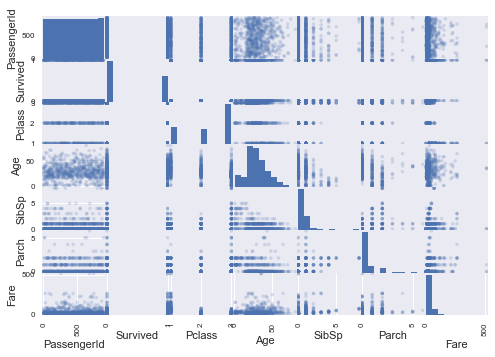

In [72]:
# matplotlib pairs plot
plt.figure(figsize=(20, 20))
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

#seaborn pairs plot
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(df3)

#ax = sns.heatmap(df3)

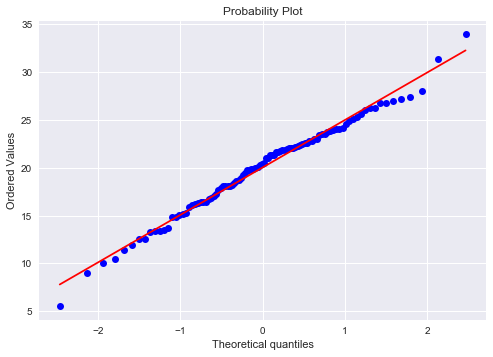

In [73]:
# fill nulls for attribute X with mean value
# df['Age'].fillna(df['Age'].mean(), inplace=True)

import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

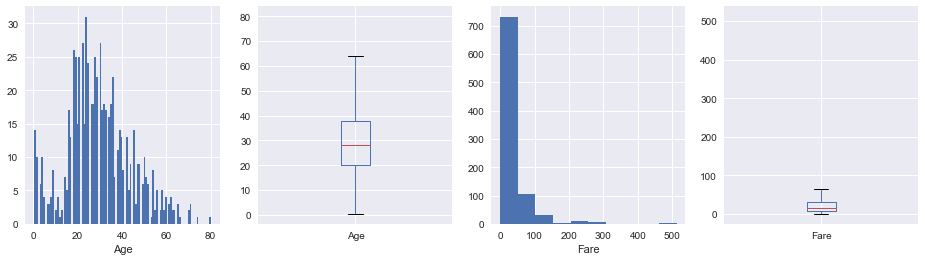

None


In [74]:
# show histogram for attribute Age
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.xlabel('Age')
df['Age'].hist(bins=100)
plt.subplot(1, 4, 2)
df.boxplot(column='Age')

plt.subplot(1, 4, 3)
plt.xlabel('Fare')
df['Fare'].hist(bins=10)
plt.subplot(1, 4, 4)
df.boxplot(column='Fare')
print(plt.show())


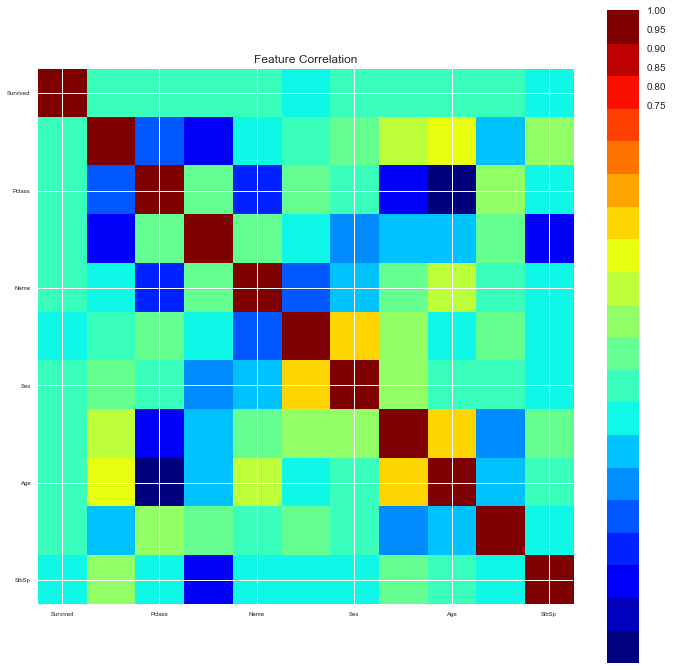

In [75]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 20)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels= list(df.columns.values)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df3)

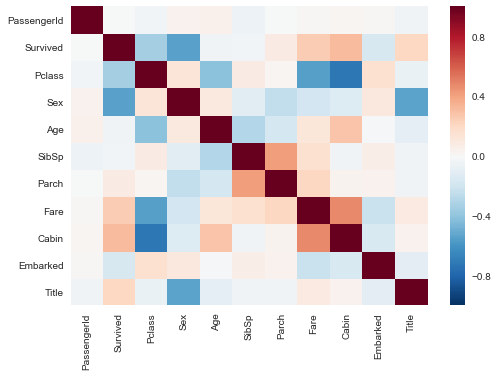

In [76]:
# calculate the correlation matrix
corr = df3.corr()
# plot the heatmap
sns.heatmap(corr)
plt.show()

# Observations: 
# Passengerid and Name can be removed
# Age, SibSp and Embarked show low correlation
# Parch and Pclass show medium correlation
# Sex, Fare and Title show high correlation 
# Cabin shows highest correlation

# Future work: Reduce complexity 
# SibSp and Parch could be combined 

In [77]:
# Conclusion based on previous observations and correlation: 
# Drop column PassengerId, Name, Ticket
df3 = df3.drop('PassengerId',axis=1)
df3 = df3.drop('Name',axis=1)
df3 = df3.drop('Ticket',axis=1)


In [78]:
# training set: 60%
# test set: 40%
rows= df3.shape[0]
index = round(0.6 * rows)
print("Number of rows =",rows,", Index at 60% = ",index)

# construct training set
df_train = df3.iloc[1:index]
df_trainclass = df_train['Survived']
df_train = df_train.drop('Survived', axis=1)
print('Training set:',df_train.shape)

# construct test set
df_test = df3.iloc[(index+1):rows]
df_testclass = df_test['Survived']
df_test = df_test.drop('Survived', axis=1)
print('Test set:',df_test.shape)


Number of rows = 891 , Index at 60% =  535
Training set: (534, 9)
Test set: (355, 9)


In [79]:
# Classification / Machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

df_data = df3.drop('Survived', axis=1)
df_target = df3['Survived']

# split data set in training and test set
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_target, test_size=0.4, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

clf = SVC(kernel='linear', C=1).fit(X_train, Y_train)
clf.score(X_test, Y_test)                           


(534, 9) (534,)
(357, 9) (357,)


0.7983193277310925

In [80]:
# Classification

# Different models
# Future work: tune model parameters to get the best fit

def evalClassModel(ClassModel, X_train, Y_train, X_test, Y_test):
    if ClassModel == 'LogisticRegression':
        model = LogisticRegression().fit(X_train, Y_train)
    if ClassModel == 'SVM':
        model = SVC(kernel='linear', C=1).fit(X_train, Y_train)
    if ClassModel == 'DecisionTree':    
        model = tree.DecisionTreeClassifier().fit(X_train, Y_train)
    if ClassModel == 'RandomForest':
        model = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
    if ClassModel == 'GradientBoost':
        model = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
    if ClassModel == 'ExtraTrees':
        model = ExtraTreesClassifier(n_estimators=100).fit(X_train, Y_train)    
    if ClassModel == 'KNN':
        model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train)
    if ClassModel == 'GaussianNaiveBayes':
        model = GaussianNB().fit(X_train, Y_train)
    # perform prediction, calcuate score and show result    
    Y = model.predict(X_test)
    score = model.score(X_test, Y_test)
    print(ClassModel, ":", score)
    return [ClassModel, score, model]

#
results = []
results.append(evalClassModel('LogisticRegression', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('DecisionTree', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('SVM', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('RandomForest', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('GradientBoost', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('ExtraTrees', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('KNN', X_train, Y_train, X_test, Y_test))
results.append(evalClassModel('GaussianNaiveBayes', X_train, Y_train, X_test, Y_test))

#print(results)




LogisticRegression : 0.8095238095238095
DecisionTree : 0.7759103641456583
SVM : 0.7983193277310925
RandomForest : 0.7843137254901961
GradientBoost : 0.8123249299719888
ExtraTrees : 0.7787114845938375
KNN : 0.6974789915966386
GaussianNaiveBayes : 0.7170868347338936


In [81]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

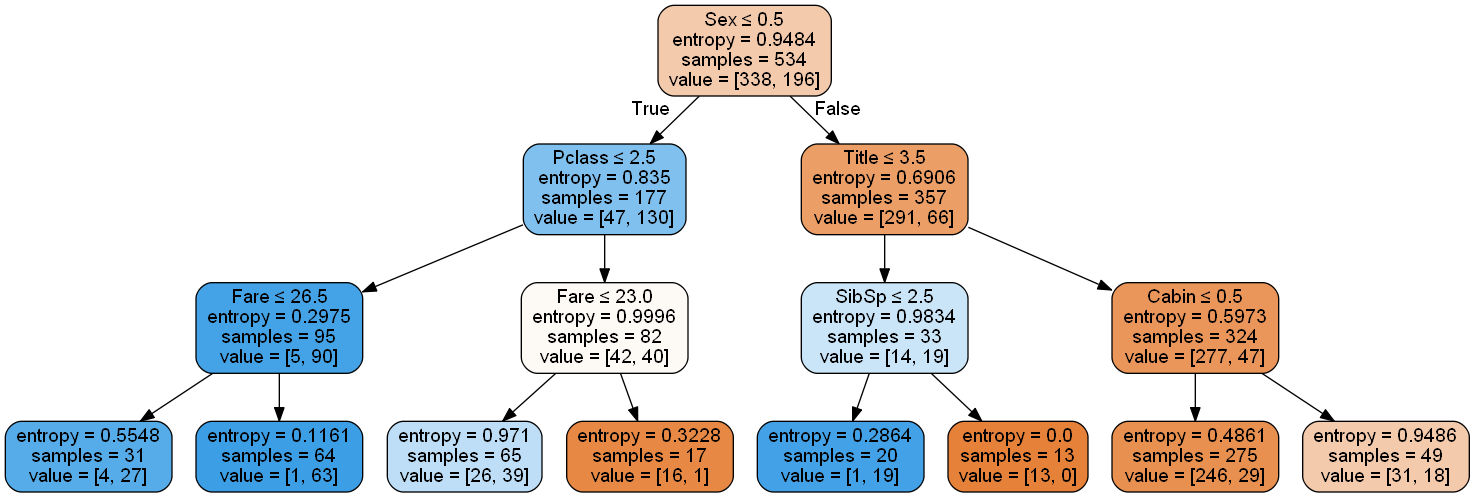

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# max_depth 
dtree = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy').fit(X_train, Y_train)
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Interpretation
# Probability to Survive in terms of features:
# Sex (female), Title (enum index>3.5), Cabin (yes)

